In [1]:
import pandas as pd 
import numpy as np

### Task 1: Data Importing and Initial Exploration

In [2]:
# Import Dataset
df=pd.read_csv('C:/Users/218882/Downloads/smart_home_energy_consumption.csv')

In [3]:
df.head()

,Date,Home_ID,City,Energy_Consumption_kWh,Occupancy,Temperature_C,Humidity_%,HVAC_Usage_kWh,Kitchen_Usage_kWh,Electronics_Usage_kWh
0,2024-03-14 06:00:00,Home_8,Lucknow,3.14,1,25.71,46.10,1.12,0.97,0.38
1,2024-04-06 06:00:00,Home_9,Hyderabad,4.70,1,27.73,45.42,0.54,1.45,0.30
2,2024-01-30 13:00:00,Home_4,Lucknow,2.27,0,16.20,57.50,-0.22,0.21,0.26
3,2024-03-05 12:00:00,Home_5,Ahmedabad,0.80,0,23.30,58.46,2.15,0.82,0.55
4,2024-01-19 00:00:00,Home_10,Kolkata,2.43,0,21.18,84.52,1.65,0.27,0.94


In [4]:
df.shape

(2500, 10)

In [5]:
#Check the Structure and Data Types:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2500 non-null   object 
 1   Home_ID                 2500 non-null   object 
 2   City                    2500 non-null   object 
 3   Energy_Consumption_kWh  2450 non-null   float64
 4   Occupancy               2500 non-null   int64  
 5   Temperature_C           2450 non-null   float64
 6   Humidity_%              2450 non-null   float64
 7   HVAC_Usage_kWh          2450 non-null   float64
 8   Kitchen_Usage_kWh       2500 non-null   float64
 9   Electronics_Usage_kWh   2500 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 195.4+ KB


In [6]:
#Basic Statistics
df.describe()

,Energy_Consumption_kWh,Occupancy,Temperature_C,Humidity_%,HVAC_Usage_kWh,Kitchen_Usage_kWh,Electronics_Usage_kWh
count,2450.000000,2500.000000,2450.000000,2450.000000,2450.000000,2500.000000,2500.000000
mean,3.515151,0.696000,23.949718,59.877824,1.009151,0.799344,0.510372
std,1.373759,0.460075,5.245470,14.790739,0.508385,0.405211,0.297242
min,-0.670000,0.000000,7.260000,8.190000,-1.030000,-0.650000,-0.560000
25%,2.680000,0.000000,20.432500,49.725000,0.670000,0.520000,0.310000
50%,3.500000,1.000000,23.910000,59.660000,1.020000,0.810000,0.510000
75%,4.310000,1.000000,27.450000,69.770000,1.360000,1.080000,0.710000
max,33.480000,1.000000,49.140000,113.160000,2.550000,2.310000,1.570000


In [7]:
#Identify Missing Values
df.isnull().sum()

Date                       0
Home_ID                    0
City                       0
Energy_Consumption_kWh    50
Occupancy                  0
Temperature_C             50
Humidity_%                50
HVAC_Usage_kWh            50
Kitchen_Usage_kWh          0
Electronics_Usage_kWh      0
dtype: int64

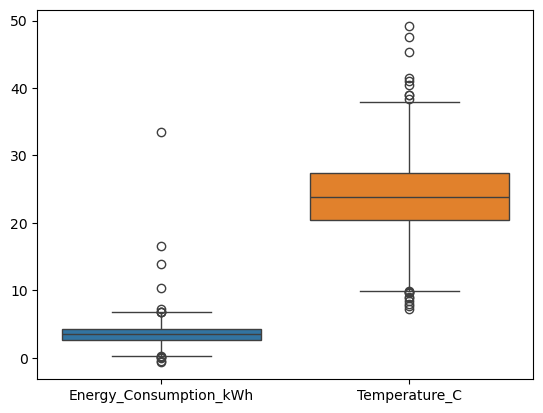

In [8]:
#Identify Outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df[['Energy_Consumption_kWh', 'Temperature_C']])
plt.show()

In [9]:
# create New Column 
def categorize_weather_conditions(row):
    if row['Temperature_C'] < 15:
        return 'Cold'
    elif row['Humidity_%'] > 70:
        return 'Humid'
    elif 15 <= row['Temperature_C'] < 25:
        return 'Warm'
    else:
        return 'Hot'

# Apply the function to create a new column
df['Weather_Conditions'] = df.apply(categorize_weather_conditions, axis=1)

# Check the updated DataFrame
print(df[['Temperature_C', 'Humidity_%', 'Weather_Conditions']].head())

   Temperature_C  Humidity_% Weather_Conditions
0          25.71       46.10                Hot
1          27.73       45.42                Hot
2          16.20       57.50               Warm
3          23.30       58.46               Warm
4          21.18       84.52              Humid


In [10]:
# Inconsistencies
# Check for unexpected data types or erroneous values.
print(df['Weather_Conditions'].value_counts())
print(df['City'].value_counts())

Weather_Conditions
Warm     1019
Hot       799
Humid     580
Cold      102
Name: count, dtype: int64
City
Lucknow      277
Hyderabad    267
Kolkata      263
Jaipur       255
Pune         253
Ahmedabad    252
Bangalore    251
Chennai      232
Delhi        226
Mumbai       224
Name: count, dtype: int64


### Task 2: Handling Missing Data

In [11]:
# Imputation for Numerical Features
df['Energy_Consumption_kWh'].fillna(df['Energy_Consumption_kWh'].median(), inplace=True)
df['Temperature_C'].fillna(df['Temperature_C'].median(), inplace=True)
df['Humidity_%'].fillna(df['Humidity_%'].mean(), inplace=True)
df['HVAC_Usage_kWh'].fillna(df['HVAC_Usage_kWh'].median(), inplace=True)

C:\Users\218882\AppData\Local\Temp\ipykernel_6348\1665430899.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Energy_Consumption_kWh'].fillna(df['Energy_Consumption_kWh'].median(), inplace=True)
C:\Users\218882\AppData\Local\Temp\ipykernel_6348\1665430899.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

### Task 3: Outlier Detection and Handling

In [12]:
#Identify Outliers

# Using IQR method
Q1 = df[['Energy_Consumption_kWh', 'Temperature_C']].quantile(0.25)
Q3 = df[['Energy_Consumption_kWh', 'Temperature_C']].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df[['Energy_Consumption_kWh', 'Temperature_C']] < (Q1 - 1.5 * IQR)) | (df[['Energy_Consumption_kWh', 'Temperature_C']] > (Q3 + 1.5 * IQR))
outliers = df[outlier_condition.any(axis=1)]

In [13]:
#Handling Outliers
#Capping:
df['Energy_Consumption_kWh'] = df['Energy_Consumption_kWh'].clip(lower=Q1['Energy_Consumption_kWh'] - 1.5 * IQR['Energy_Consumption_kWh'],
                                                                 upper=Q3['Energy_Consumption_kWh'] + 1.5 * IQR['Energy_Consumption_kWh'])


### Task 4: Time-Series Consistency

In [14]:
#Check for Duplicates
print(df['Date'].duplicated().sum()) 


0


In [15]:
# Convert Date column into a datetime type 
df['Date']=pd.to_datetime(df['Date'])

### Task 5: Data Normalization

In [32]:
# Using Standard Scaler Normalize the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Energy_Consumption_kWh', 'HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh']] = scaler.fit_transform(df[['Energy_Consumption_kWh', 'HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh']])


## Week 2: Exploratory Data Analysis (EDA) & Visualization 
### Task 1: Univariate Analysis

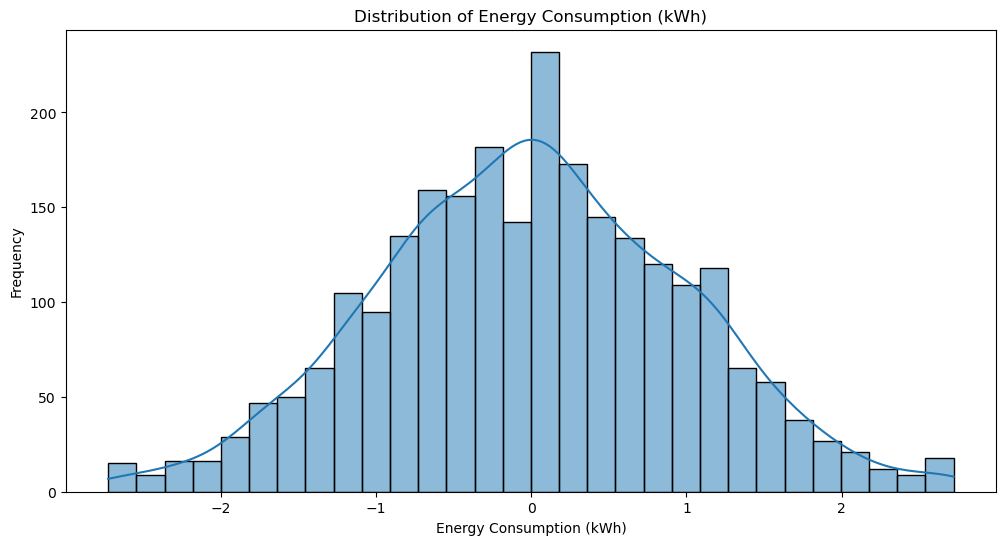

In [36]:
# Histograms

# Histograms for Energy consumption column
plt.figure(figsize=(12, 6))
sns.histplot(df['Energy_Consumption_kWh'], bins=30, kde=True)
plt.title('Distribution of Energy Consumption (kWh)')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()


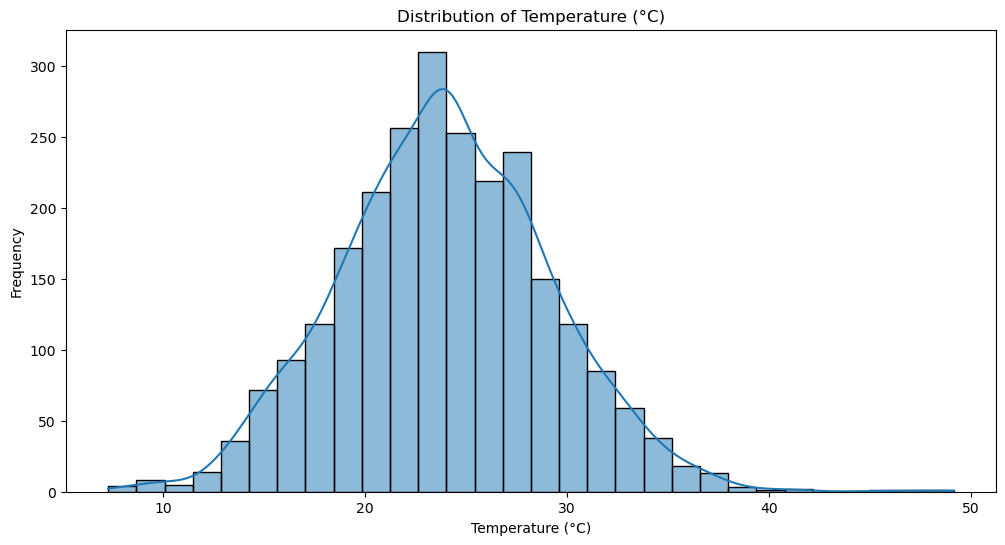

In [38]:
# Histogram for Temperature column
plt.figure(figsize=(12, 6))
sns.histplot(df['Temperature_C'], bins=30, kde=True)
plt.title('Distribution of Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


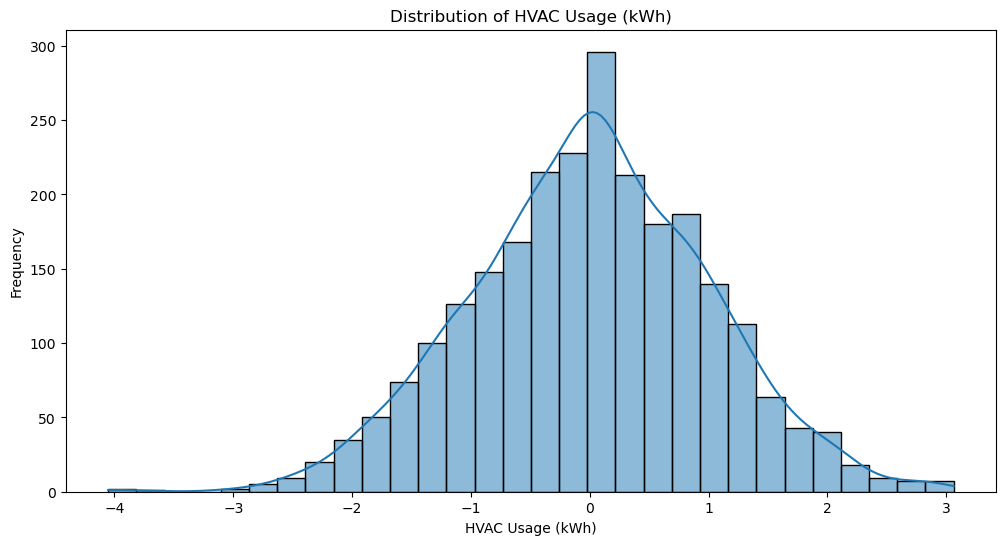

In [40]:
# Histogram for HVAC Usages column
plt.figure(figsize=(12, 6))
sns.histplot(df['HVAC_Usage_kWh'], bins=30, kde=True)
plt.title('Distribution of HVAC Usage (kWh)')
plt.xlabel('HVAC Usage (kWh)')
plt.ylabel('Frequency')
plt.show()

C:\Users\218882\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


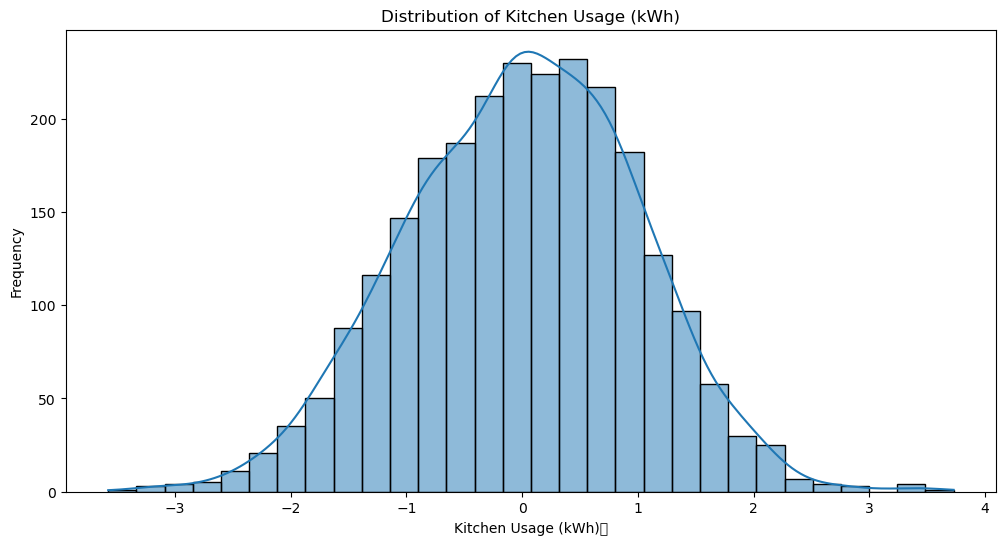

In [44]:
# Histogram for Kitchen usages column
plt.figure(figsize=(12, 6))
sns.histplot(df['Kitchen_Usage_kWh'], bins=30, kde=True)
plt.title('Distribution of Kitchen Usage (kWh)')
plt.xlabel('Kitchen Usage (kWh)	')
plt.ylabel('Frequency')
plt.show()

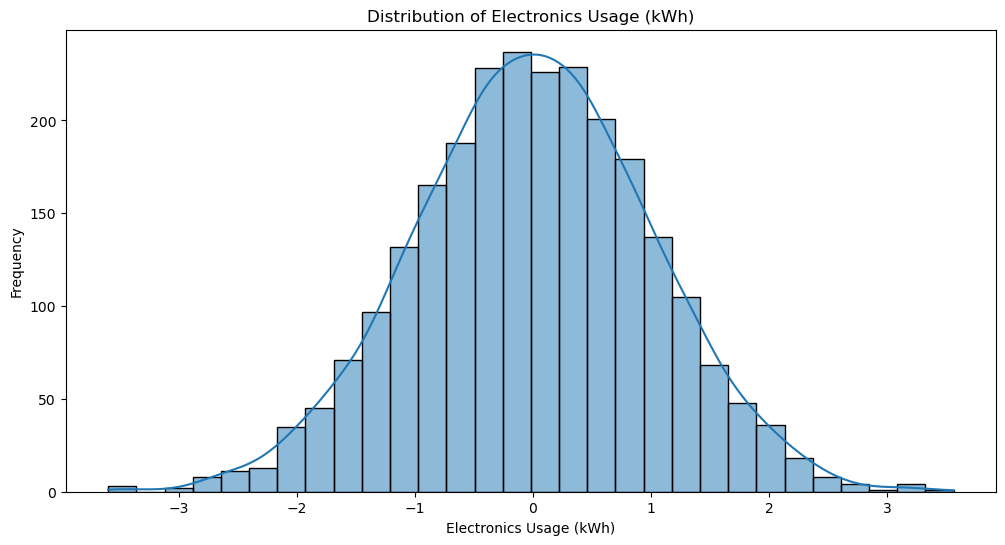

In [46]:
# Histogram for Electronic usage column.
plt.figure(figsize=(12, 6))
sns.histplot(df['Electronics_Usage_kWh'], bins=30, kde=True)
plt.title('Distribution of Electronics Usage (kWh)')
plt.xlabel('Electronics Usage (kWh)')
plt.ylabel('Frequency')
plt.show()

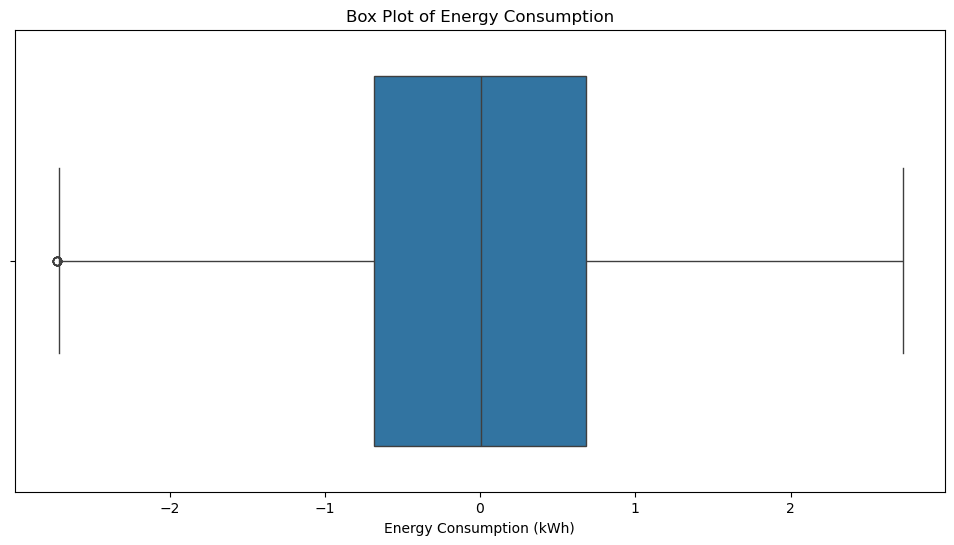

In [48]:
# Box Plot for Energy consuption column
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Energy_Consumption_kWh'])
plt.title('Box Plot of Energy Consumption')
plt.xlabel('Energy Consumption (kWh)')
plt.show()

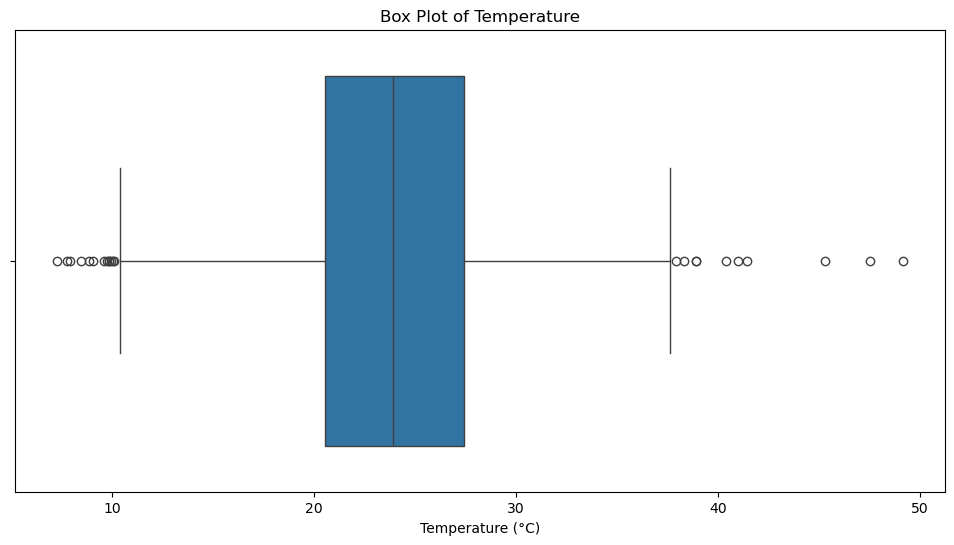

In [50]:
# Box plot for Temparature column
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Temperature_C'])
plt.title('Box Plot of Temperature')
plt.xlabel('Temperature (°C)')
plt.show()

### Task 2: Bivariate and Multivariate Analysis

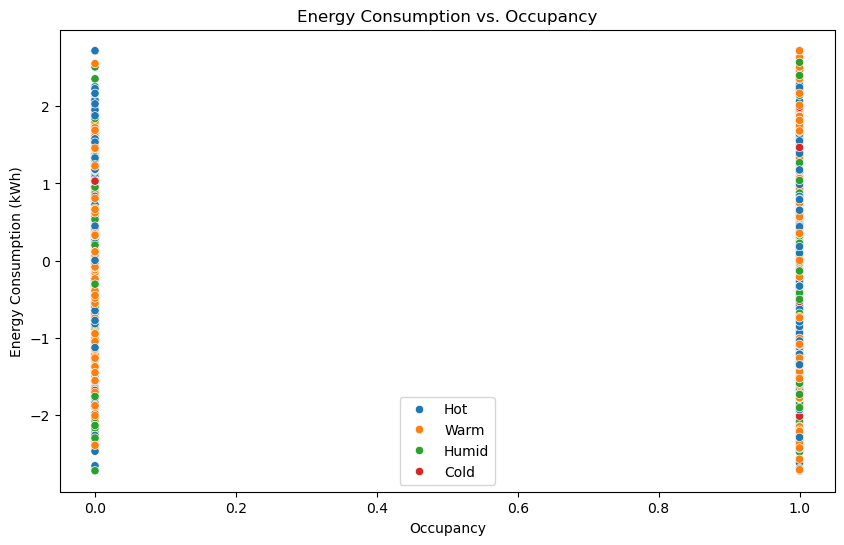

In [54]:
#Visualizations (Scatter Plots)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Occupancy', y='Energy_Consumption_kWh', hue='Weather_Conditions')
plt.title('Energy Consumption vs. Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()

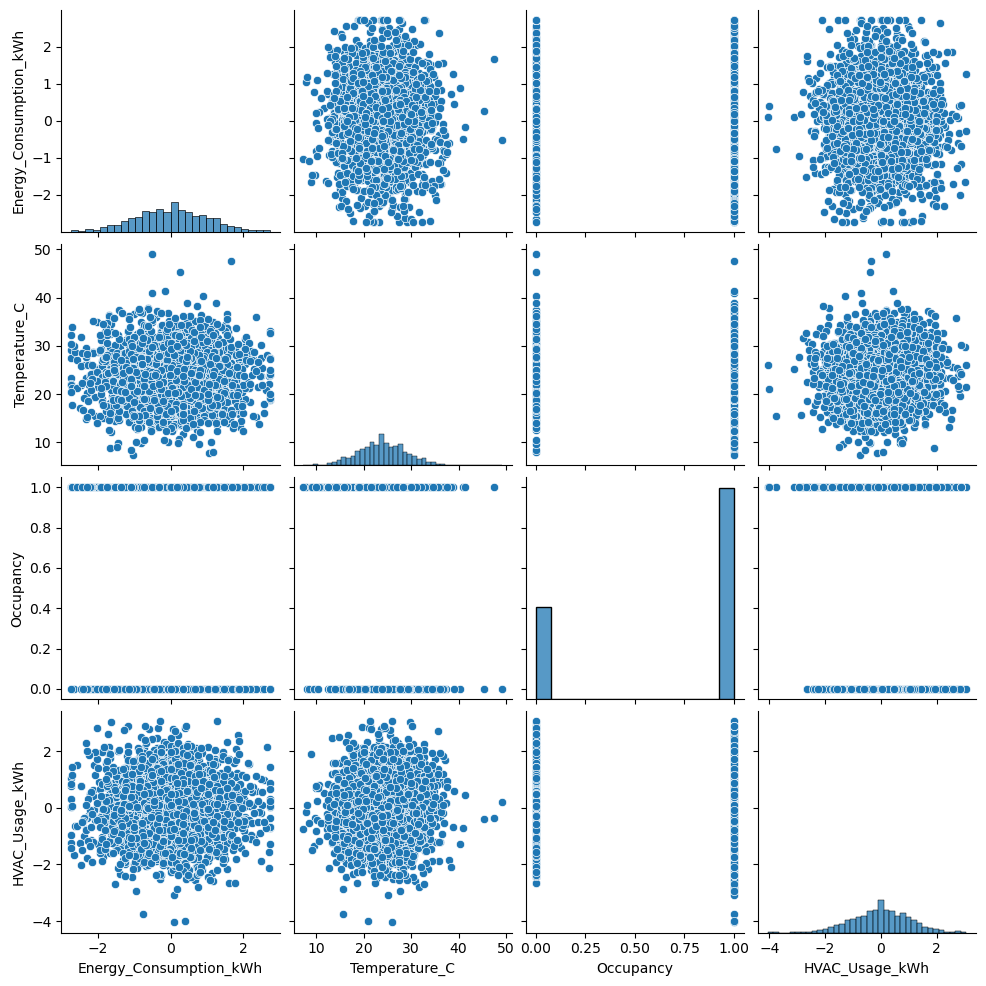

In [60]:
#Pair Plots

sns.pairplot(df[['Energy_Consumption_kWh', 'Temperature_C', 'Occupancy', 'HVAC_Usage_kWh']])
plt.show()

In [64]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [66]:
correlation_matrix = df_numeric.corr()

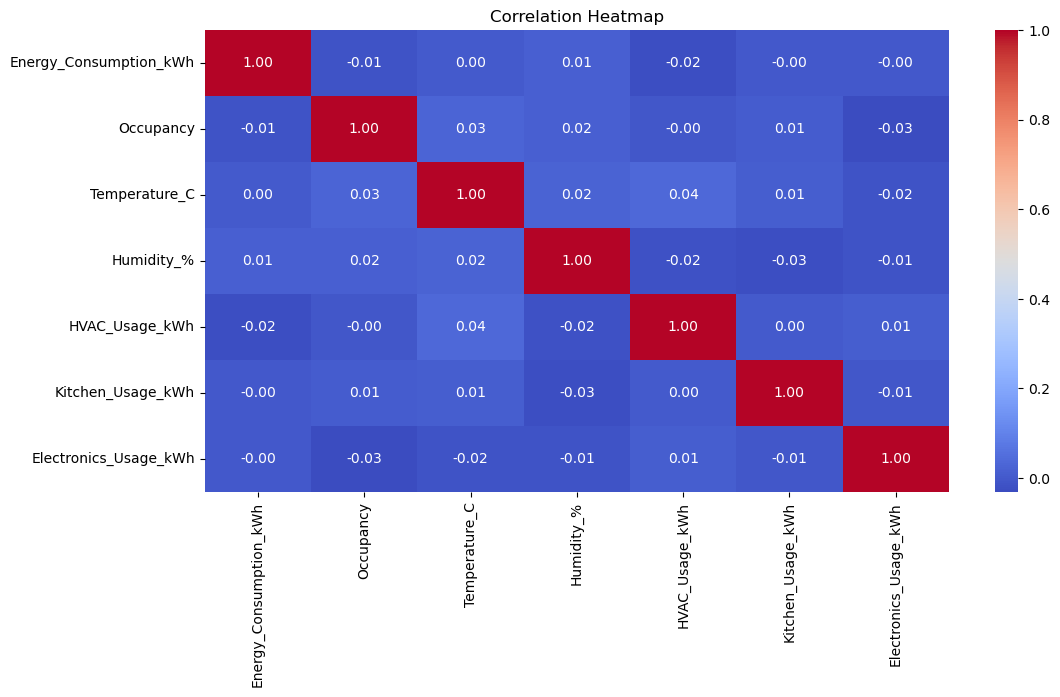

In [74]:
# Correlation Heatmap

#Heatmap for visualization
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Task 3: Time-Series Analysis

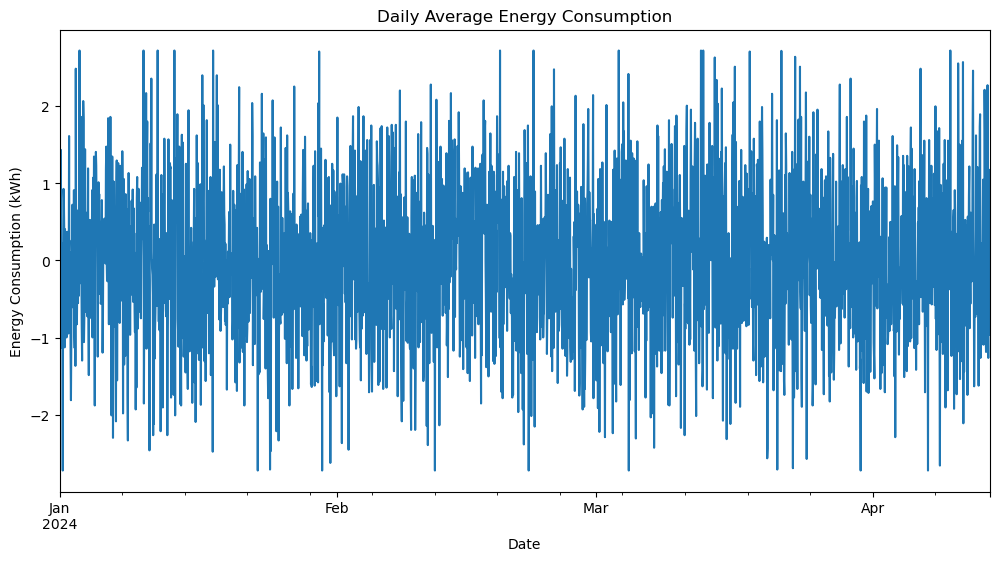

In [84]:
#Analyze Trends Over Time

df['Date'] = df.Date
daily_consumption = df.groupby('Date')['Energy_Consumption_kWh'].mean()

plt.figure(figsize=(12, 6))
daily_consumption.plot()
plt.title('Daily Average Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

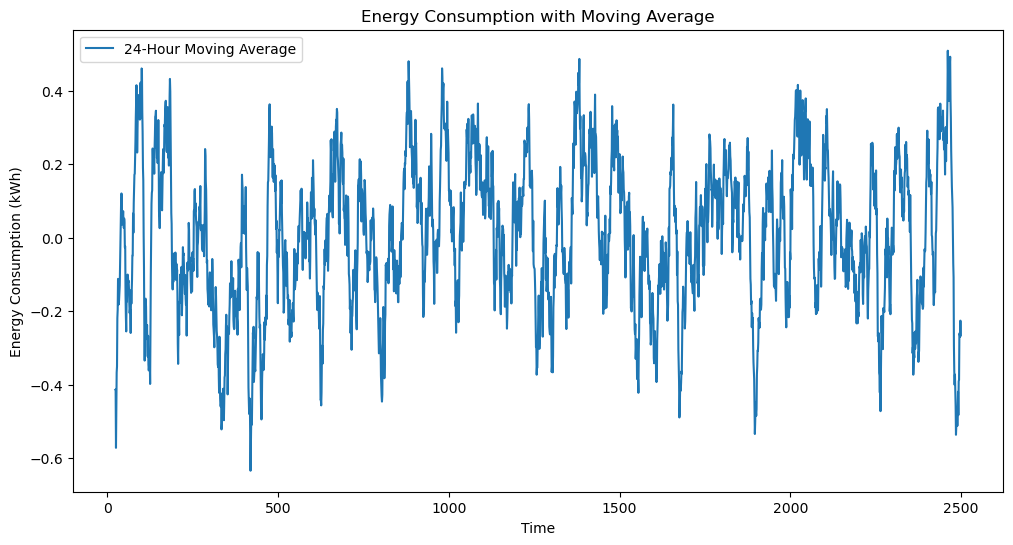

In [86]:
# Moving Averages

plt.figure(figsize=(12, 6))
df['Energy_Consumption_kWh'].rolling(window=24).mean().plot(label='24-Hour Moving Average')
plt.title('Energy Consumption with Moving Average')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()

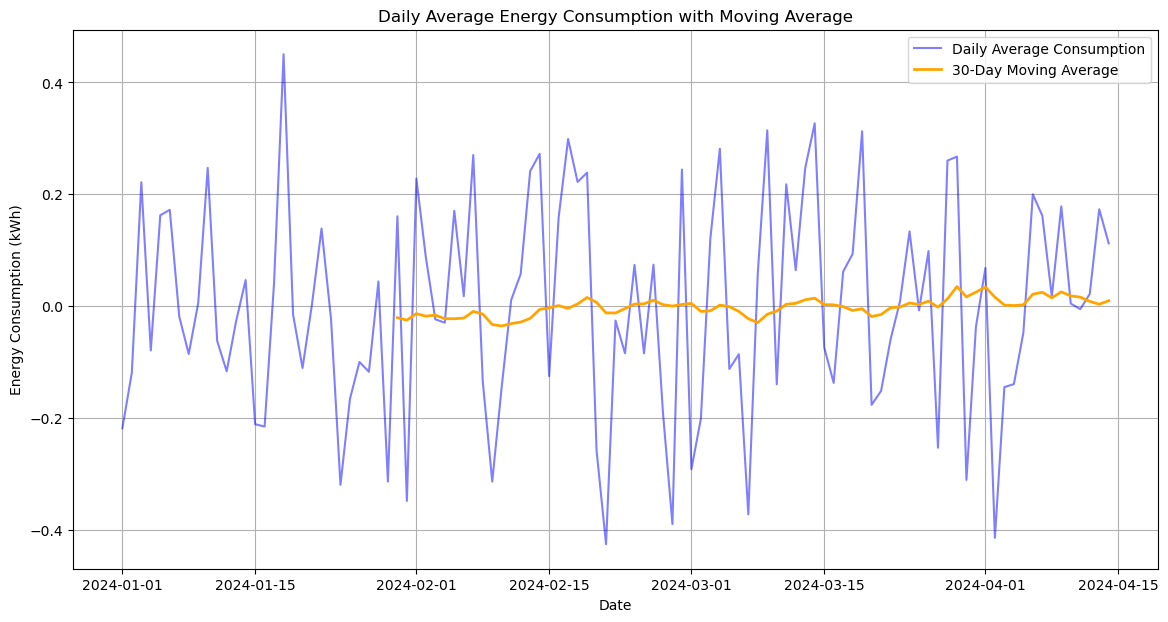

In [90]:
#Identify Seasonality:
#Yearly Patterns

df['year'] = df['Date'].dt.year
daily_consumption = df.resample('D', on='Date')['Energy_Consumption_kWh'].mean()
moving_average = daily_consumption.rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(daily_consumption.index, daily_consumption, label='Daily Average Consumption', color='blue', alpha=0.5)
plt.plot(moving_average.index, moving_average, label='30-Day Moving Average', color='orange', linewidth=2)
plt.title('Daily Average Energy Consumption with Moving Average')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid()
plt.show()


C:\Users\218882\AppData\Local\Temp\ipykernel_6348\1785393345.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



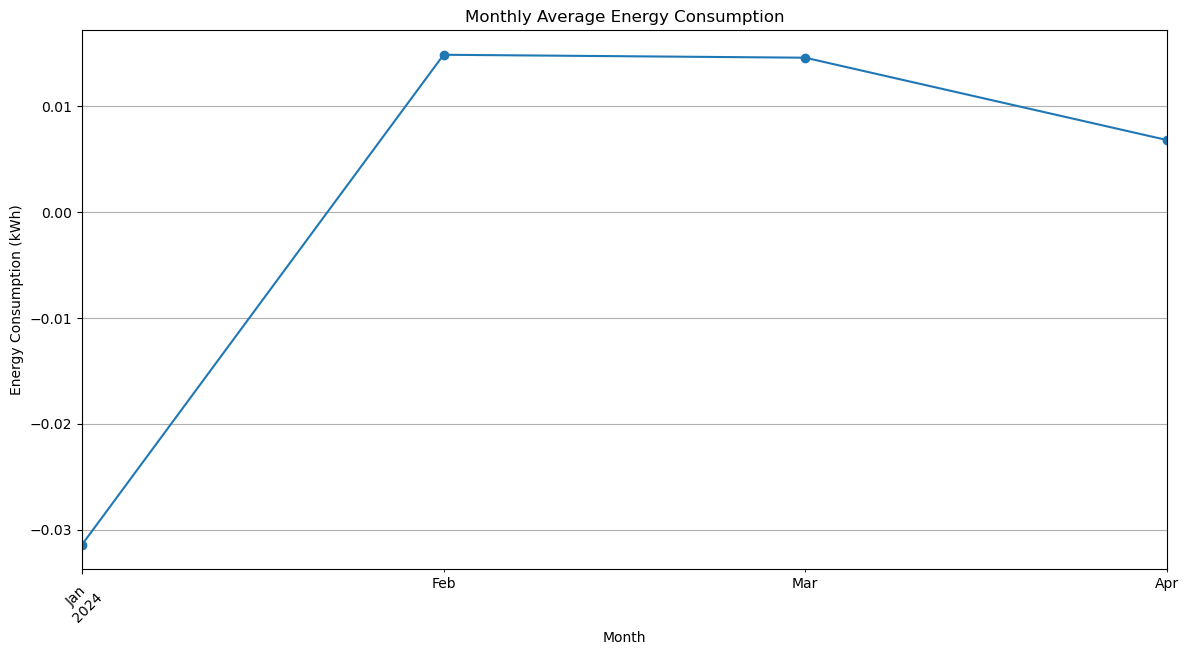

In [104]:
# Monthly Pattern
monthly_consumption = df.resample('M', on='Date')['Energy_Consumption_kWh'].mean()

plt.figure(figsize=(14, 7))
monthly_consumption.plot(kind='line', marker='o', linestyle='-')
plt.title('Monthly Average Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Task 4: Feature Engineering

In [92]:
#Create New Features

df['Energy_Per_Occupant'] = df['Energy_Consumption_kWh'] / df['Occupancy'].replace(0, 1)  # Avoid division by zero
df['Temperature_Difference'] = df['Temperature_C'] - df['Temperature_C'].mean()  # Temperature deviation from mean

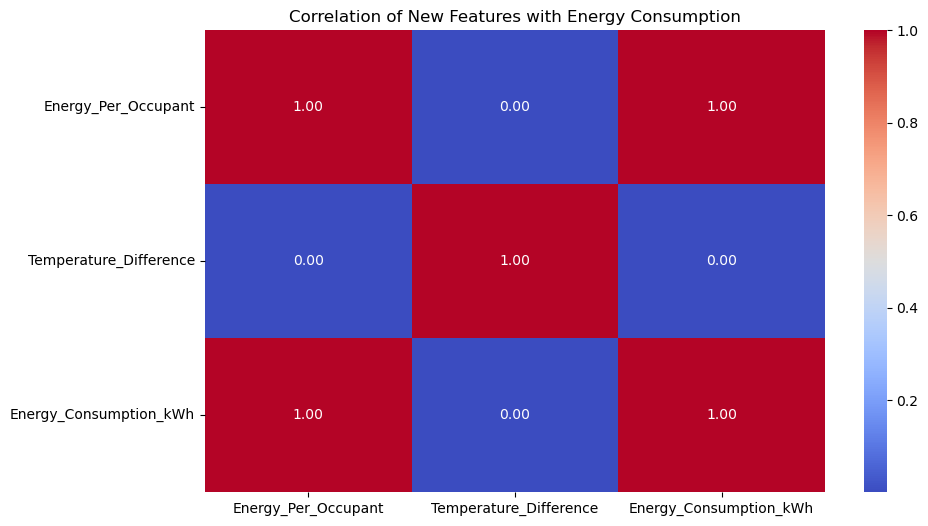

In [94]:
#Evaluate Importance:
#Correlation Analysis

plt.figure(figsize=(10, 6))
new_features_corr = df[['Energy_Per_Occupant', 'Temperature_Difference', 'Energy_Consumption_kWh']].corr()
sns.heatmap(new_features_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of New Features with Energy Consumption')
plt.show()


### Task 5: Advanced Visualizations

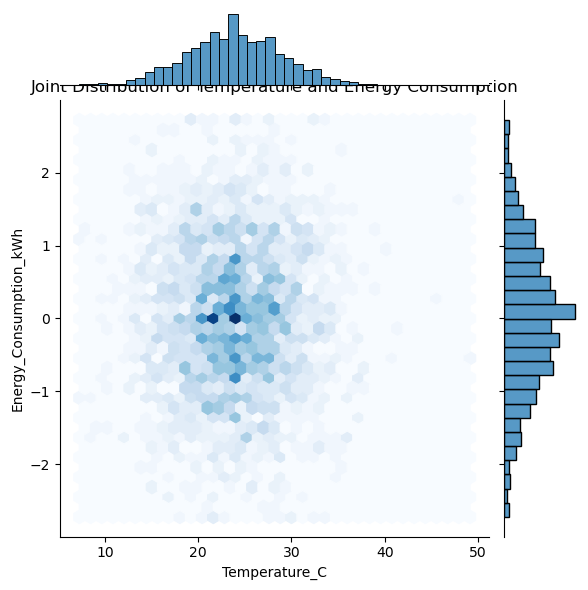

In [96]:
#Joint Plots

sns.jointplot(data=df, x='Temperature_C', y='Energy_Consumption_kWh', kind='hex', cmap='Blues')
plt.title('Joint Distribution of Temperature and Energy Consumption')
plt.show()

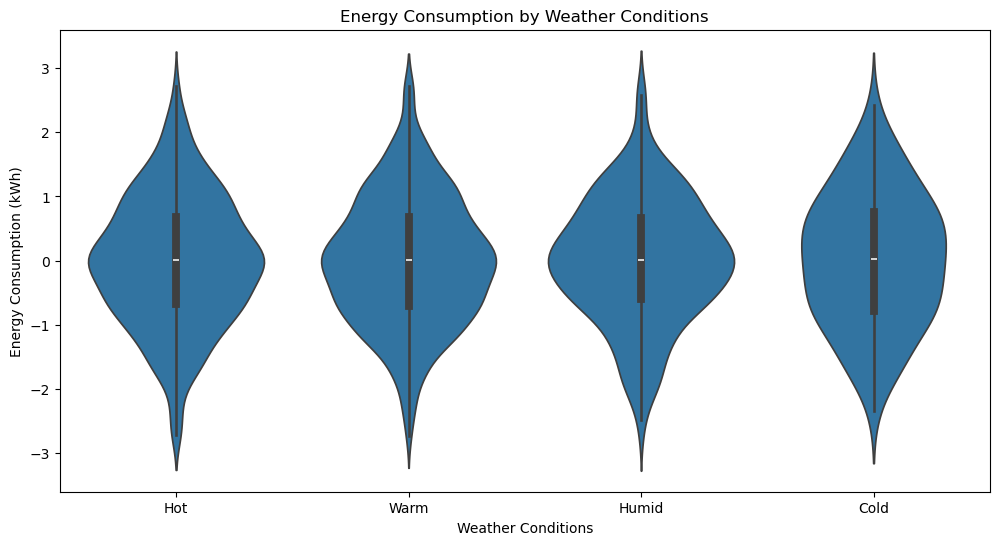

In [98]:
# Violin Plots

plt.figure(figsize=(12, 6))
sns.violinplot(x='Weather_Conditions', y='Energy_Consumption_kWh', data=df)
plt.title('Energy Consumption by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

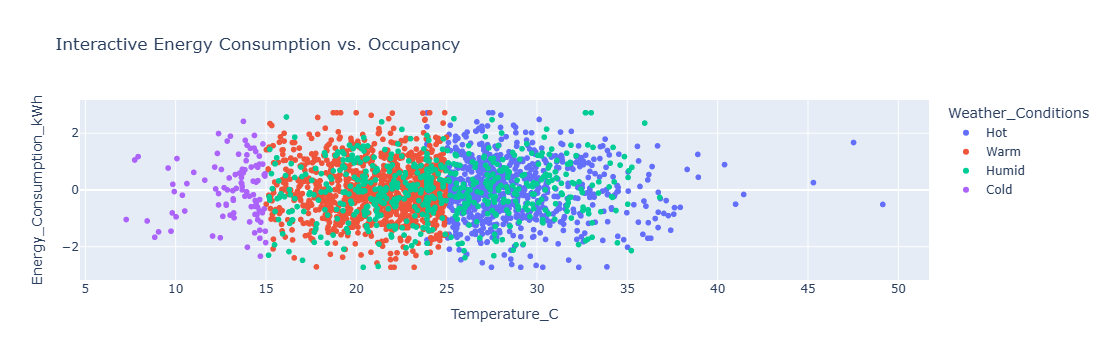

<Figure size 1000x700 with 0 Axes>

In [108]:
#Interactive Plots (using Plotly)

import plotly.express as px

plt.figure(figsize=(10,7))
fig = px.scatter(df, x='Temperature_C', y='Energy_Consumption_kWh', color='Weather_Conditions', title='Interactive Energy Consumption vs. Occupancy')
fig.show()


### Summary of Findings from EDA

__Distribution Insights__ : Energy consumption is positively skewed, while temperature shows a more normal distribution.
                            Bivariate Relationships: Higher occupancy correlates with increased energy consumption; weather conditions also affect                                   energy usage patterns.

__Time-Series Trends__: Energy consumption displays clear daily and weekly patterns, with notable peaks on weekends.
                        Feature Engineering: New features like energy per occupant reveal additional insights, correlating well with overall energy                              consumption.
                        
__Visual Insights__: Advanced visualizations provide deeper understanding, allowing for exploration of interactions and distributions in the data.
                     The dataset is now well-understood, revealing significant patterns and relationships that will guide further analysis and                                predictive modeling.

## Week 3: Machine Learning 
### Task 1: Data Splitting

In [110]:
# Data is sorted by using Date column 
df = df.sort_values(by='Date')

train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

X_train = train.drop(columns=['Energy_Consumption_kWh'])
y_train = train['Energy_Consumption_kWh']
X_test = test.drop(columns=['Energy_Consumption_kWh'])
y_test = test['Energy_Consumption_kWh']

print(f'Training set size: {len(train)}')
print(f'Testing set size: {len(test)}')

### Task 2: Model Selection and Training

In [126]:
#Import a Linear Regression Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [114]:
print(X_train.dtypes)

Date                      datetime64[ns]
Home_ID                           object
City                              object
Occupancy                          int64
Temperature_C                    float64
Humidity_%                       float64
HVAC_Usage_kWh                   float64
Kitchen_Usage_kWh                float64
Electronics_Usage_kWh            float64
Weather_Conditions                object
year                               int32
Energy_Per_Occupant              float64
Temperature_Difference           float64
dtype: object


In [118]:
X_train['year'] = X_train['Date'].dt.year
X_train['month'] = X_train['Date'].dt.month
X_train['day'] = X_train['Date'].dt.day
X_train.drop(columns=['Date'], inplace=True)  # Drop the original Date column if no longer needed

In [120]:
X_test['year'] = X_test['Date'].dt.year
X_test['month'] = X_test['Date'].dt.month
X_test['day'] = X_test['Date'].dt.day
X_test.drop(columns=['Date'], inplace=True)  # Drop if needed

In [122]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns of train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [130]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [132]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [142]:
print({'Train Prediction: =':train_predictions})

{'Train Prediction: =': array([-0.30519218,  1.03034357, -1.05001019, ...,  0.9104878 ,
       -0.97296006,  2.70832439])}


### Task 3: Model Evaluation

In [144]:
# Evaluate the Model: Use Mean Absolute Error and R-squared

from sklearn.metrics import mean_absolute_error, r2_score

test_predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 1.5747473637583996e-14
R-squared: 1.0


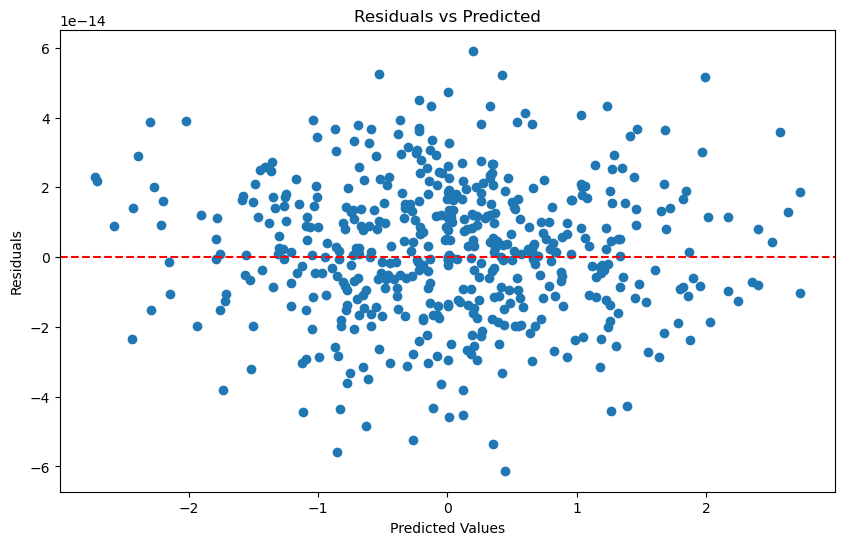

In [146]:
# Analyze Residuals: Check for patterns in the residuals

residuals = y_test - test_predictions

plt.figure(figsize=(10, 6))
plt.scatter(test_predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Task 4: Feature Importance and Interpretation

In [148]:
# Identify Important Features: Use coefficients from the linear regression model:

feature_importance = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
print(feature_importance.sort_values(by='Coefficient', ascending=False))


                           Coefficient
Energy_Per_Occupant       1.000000e+00
Temperature_C             1.264899e-03
year                      5.883856e-06
Weather_Conditions_Humid  1.615283e-15
Electronics_Usage_kWh     1.293852e-15
HVAC_Usage_kWh            1.205231e-15
Weather_Conditions_Hot    1.052043e-15
Weather_Conditions_Warm   1.036522e-15
Home_ID_Home_7            6.115920e-16
day                       3.797787e-16
month                     3.623654e-16
Home_ID_Home_6            2.781596e-16
Home_ID_Home_8            2.687936e-16
Home_ID_Home_9            1.208824e-16
Occupancy                 4.291908e-17
City_Kolkata              1.511099e-17
Home_ID_Home_3           -5.621549e-18
Home_ID_Home_2           -2.249832e-17
Home_ID_Home_4           -6.227959e-17
Humidity_%               -8.423117e-17
Home_ID_Home_5           -1.066890e-16
Home_ID_Home_10          -1.260277e-16
City_Pune                -1.584423e-16
City_Jaipur              -1.715822e-16
City_Chennai             

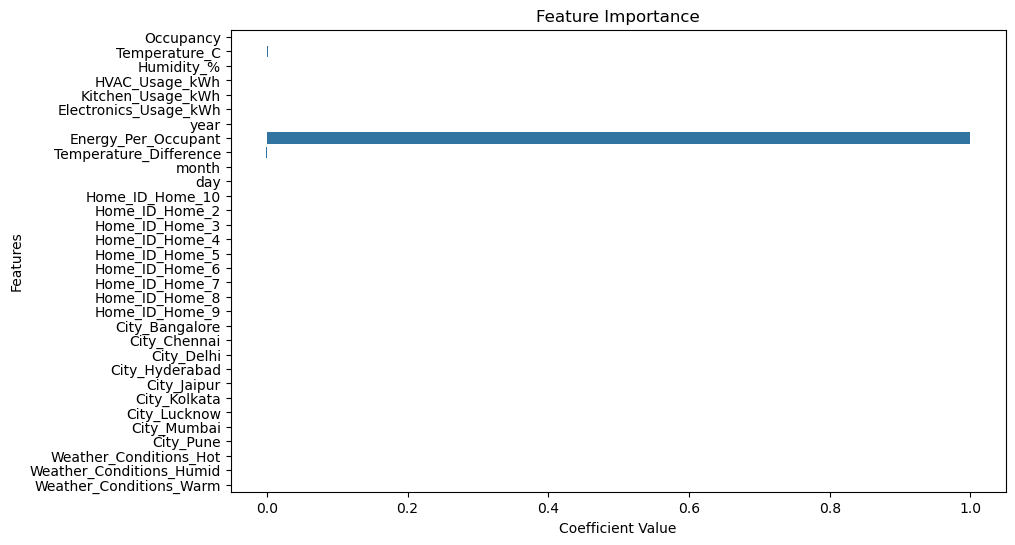

In [150]:
# Feature Importance Plot: Visualize feature importance:

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance['Coefficient'], y=feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

### Task 5: Predictive System and Testing

In [152]:
# Build a Predictive System: Use the trained model to predict energy consumption on the test set

predictions = model.predict(X_test)

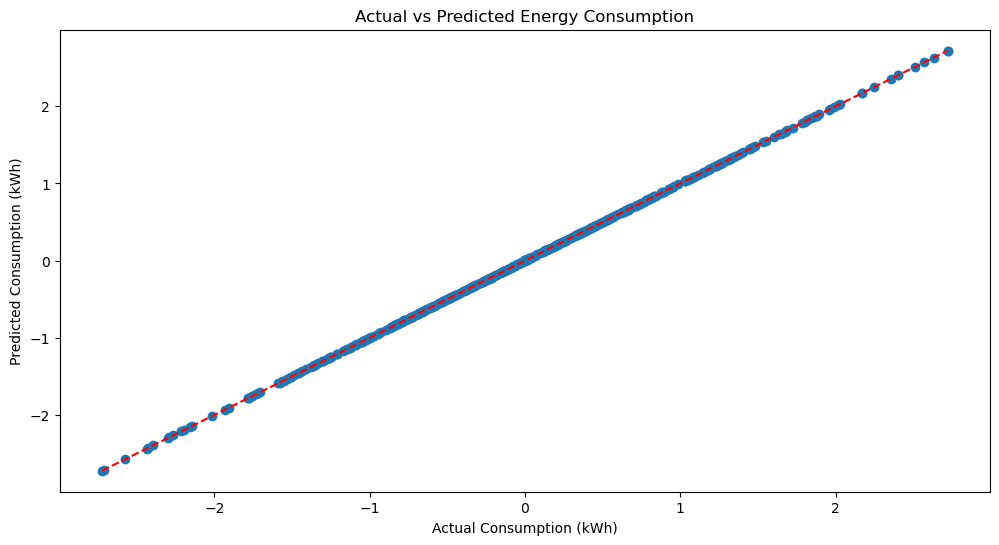

In [154]:
# Compare Predictions with Actual Values: Visualize the results:

plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Actual Consumption (kWh)')
plt.ylabel('Predicted Consumption (kWh)')
plt.show()

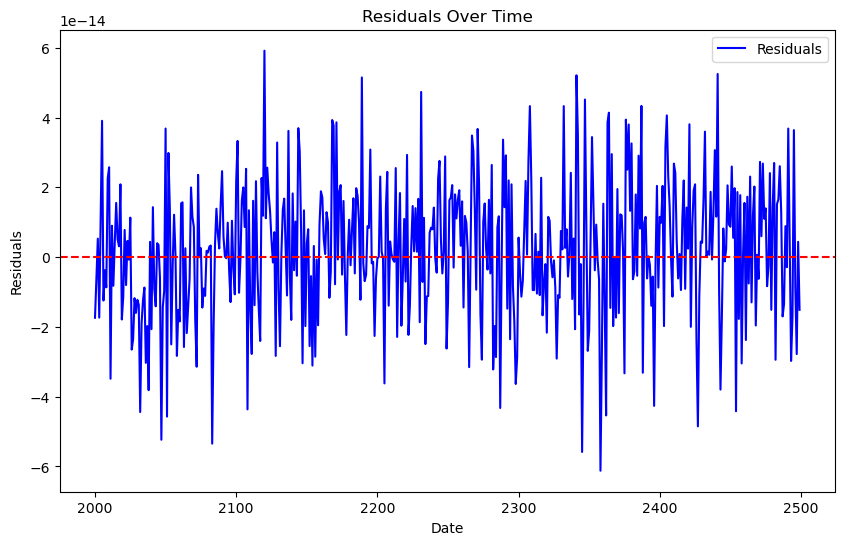

In [156]:
# Residual Plot: Visualize residuals to assess model performance

plt.figure(figsize=(10, 6))
plt.plot(test.index, residuals, label='Residuals', color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [ ]:
# END 